In [ ]:
# Run this cell and upload the downloaded dataset("resume_dataset2.csv") or custom one
# in every session or just run the below cell for just the Kaggle Dataset

from google.colab import files
files.upload()

In [ ]:
# Downloading the csv file(The Kaggle one) from a link to use it

import requests
file_url = "https://drive.google.com/uc?id=1p-mqOCwescBeCctMMf9GJusBINjsXJRA&export=download"
req = requests.get(file_url)
csv_file = open('resume_dataset2.csv', 'wb')
csv_file.write(req.content)
csv_file.close()

In [ ]:
# Necessary Imports, not importing models (will be done later if required)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Creating DataFrame and checking out first 5 and last 5 values

df = pd.read_csv("resume_dataset2.csv")
print(df.head())
print(df.tail())

       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
    Category                                             Resume
957  Testing  Computer Skills: â¢ Proficient in MS office (...
958  Testing  â Willingness to accept the challenges. â ...
959  Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960  Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961  Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [ ]:
# Let's check how many resumes are there in each category of job roles
display(df.groupby('Category').count())

# Checking for null values
display(df[df.isnull().any(axis=1)])

# Summary of the dataset
df.describe()

,Resume
Category,
Advocate,20
Arts,36
Automation Testing,26
Blockchain,40
Business Analyst,28
Civil Engineer,24
Data Science,40
Database,33
DevOps Engineer,55


,Category,Resume


,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [ ]:
# Some Data Cleaning, before model making.
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

df['resume_clean'] = df.Resume.apply(lambda x: cleanResume(x))
print(df.resume_clean[10])

Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the r

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
def naive_bayes_label_encoding(dataframe, test_size=0.2, max_features=100):

  # Label encoding
  df = dataframe.copy()
  df['Category'] = df['Category'].astype('category')
  df['Category_encoded'] = df['Category'].cat.codes
  print("After Label Encoding: ")
  #display(df.head())

  # Spliting the dataframe in trainning and testing set
  X_train, X_test, Y_train, Y_test = train_test_split(df['Resume'], df['Category_encoded'], test_size=test_size)

  # Initializing the Tfidf Vectorizer and fitting the training data
  vectorizer = TfidfVectorizer(stop_words='english', max_features=max_features)
  vectorizer.fit(X_train)

  # Initializing the Naive Bayes Model
  cls = MultinomialNB()
  cls.fit(vectorizer.transform(X_train), Y_train)

  # Measuring the Accuracy
  y_pred = cls.predict(vectorizer.transform(X_test))
  accuracy = accuracy_score(Y_test, y_pred)
  print("Accuracy: %.3f"%accuracy)
  print(classification_report(Y_test, y_pred, zero_division=0))
  return accuracy

In [ ]:
naive_bayes_label_encoding(df)

After Label Encoding: 
Accuracy: 0.865
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.85      1.00      0.92        11
           2       0.00      0.00      0.00         2
           3       1.00      0.89      0.94         9
           4       1.00      1.00      1.00         6
           5       1.00      0.50      0.67         6
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         4
           8       1.00      0.92      0.96        13
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      0.43      0.60         7
          12       0.36      0.83      0.50         6
          13       0.90      1.00      0.95         9
          14       1.00      0.33      0.50         6
          15       0.87      1.00      0.93        13
          16       0.57      0.50      0.5

0.8652849740932642

In [ ]:
# Varying the number of features

%%capture
no_of_features = list(range(50, 500, 10))
accuracy = list([naive_bayes_label_encoding(df, max_features=no_of_features[i]) for i in range(len(no_of_features))])

maxIndex = accuracy.index(max(accuracy))

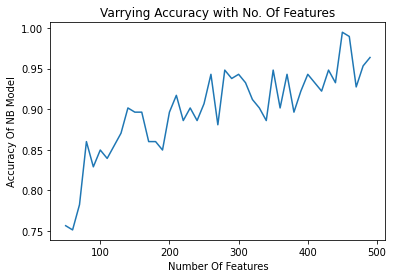

Max Accuracy: {0.99}
No. Of Features: 450


In [ ]:
plt.plot(no_of_features, accuracy)
plt.xlabel("Number Of Features")
plt.ylabel("Accuracy Of NB Model")
plt.title("Varrying Accuracy with No. Of Features")
plt.show()

print("Max Accuracy: {%.2f}"%accuracy[maxIndex])
print("No. Of Features: {}".format(no_of_features[maxIndex]))